# Explore here

In [12]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

# Variables de entorno
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Configurar Spotipy con credenciales
auth_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret)
sp = Spotify(auth_manager=auth_manager)

In [13]:
# Artista Favorito
artist_id = "711MCceyCBcFnzjGY4Q7Un"

# Información del artista completa
artist_info = sp.artist(artist_id)
# print(artist_info)

# Top 10 canciones de Artista Favorito
top_tracks = sp.artist_top_tracks(artist_id)

# Código para acceder y mostrar los nombres de las tracks, popularidad y duración en minutos# Obtener las canciones más populares del artista
top_tracks = sp.artist_top_tracks(artist_id)

# Extraer los detalles de las canciones más populares
tracks_info = []
for track in top_tracks["tracks"]:
    # Convertir la duración de milisegundos a minutos
    duration_minutes = track['duration_ms'] / 60000

    # Almacenar la información relevante (nombre, popularidad, duración)
    track_details = {
        'name': track['name'],
        'popularity': track['popularity'],
        # Redondeamos a 2 decimales
        'duration_minutes': round(duration_minutes, 2)
    }

    tracks_info.append(track_details)

# Mostrar los resultados
for idx, track in enumerate(tracks_info, 1):
    print(
        f"{idx}. {track['name']} - Popularidad: {track['popularity']} - Duración: {track['duration_minutes']} minutos")

1. Highway to Hell - Popularidad: 84 - Duración: 3.47 minutos
2. Thunderstruck - Popularidad: 82 - Duración: 4.88 minutos
3. Back In Black - Popularidad: 82 - Duración: 4.26 minutos
4. You Shook Me All Night Long - Popularidad: 80 - Duración: 3.5 minutos
5. T.N.T. - Popularidad: 76 - Duración: 3.58 minutos
6. Hells Bells - Popularidad: 73 - Duración: 5.2 minutos
7. Shoot to Thrill - Popularidad: 71 - Duración: 5.29 minutos
8. Dirty Deeds Done Dirt Cheap - Popularidad: 70 - Duración: 3.87 minutos
9. It's a Long Way to the Top (If You Wanna Rock 'N' Roll) - Popularidad: 69 - Duración: 5.02 minutos
10. Rock N Roll Train - Popularidad: 67 - Duración: 4.36 minutos


In [14]:
# Convertir datos en pd.Dataframe para posterior visualización
df_tracks = pd.DataFrame(tracks_info)

# Ordenamos por popularidad creciente
df_sorted = df_tracks.sort_values(by='popularity', ascending=True)

# Mostramos el top 3 de canciones con menor popularidad
top_3_tracks = df_sorted.head(3)
print(top_3_tracks)

                                                name  popularity  \
9                                  Rock N Roll Train          67   
8  It's a Long Way to the Top (If You Wanna Rock ...          69   
7                        Dirty Deeds Done Dirt Cheap          70   

   duration_minutes  
9              4.36  
8              5.02  
7              3.87  


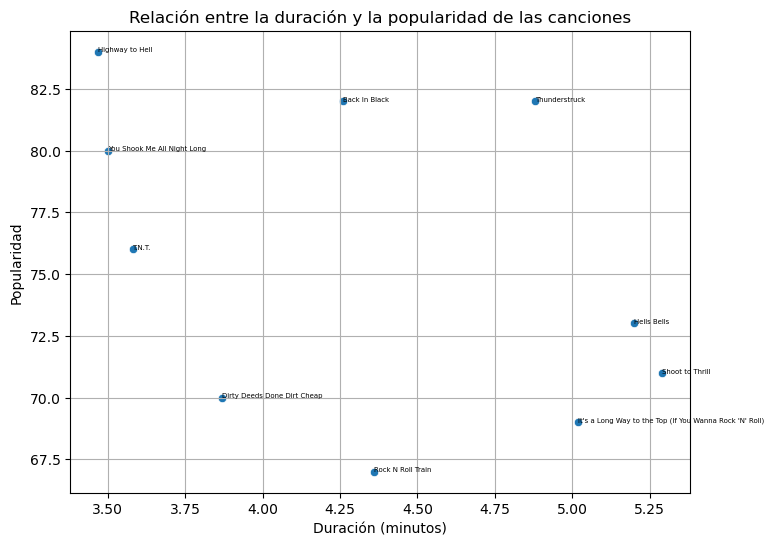

In [15]:
# Analizamos la relación estadística
# Crear el gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tracks, x='duration_minutes', y='popularity')

# Añadir títulos y etiquetas
plt.title('Relación entre la duración y la popularidad de las canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)

for i in range(len(df_tracks)):
    plt.annotate(
        df_tracks['name'].iloc[i],  # Nombre de la canción
        (df_tracks['duration_minutes'].iloc[i], df_tracks['popularity'].iloc[i]),  # Posición del texto
        fontsize=5,  # Tamaño de la fuente
    )

# Mostrar el gráfico
plt.show()

Analizando el gráfico, no podemos concluir que una canción que dure menos tienda a ser más popular que otra que dure más aunque es cierto que las 3 canciones más cortas tienden a ser más populares que las 3 últimas que duran más, por lo tanto podemos confirmar una tendencia aquí.
Si bien es una tendencia, no puede ser tratada como conclusión en este caso concreto, ya que las dos canciones (2nda y 3era) en el ranking de popularidad\ntienen una duración intermedia (2nda) y larga (3era)